In [1]:
import tensorflow as tf

from data.file import model_convolutional_dataset
from data.load import load_train_dataset, load_test_dataset
from model.convolutional import build_compile_fit_dataset

In [2]:
batch_size = 32

x_train, y_train = load_train_dataset(normalize=True)
x_test, y_test = load_test_dataset(normalize=True)

train_input = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_input = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [3]:
model, history = build_compile_fit_dataset(train_input, epochs=10)
model.summary()

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2170 - accuracy: 0.9352
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0873 - accuracy: 0.9734
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0594 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0424 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0329 - accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0280 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0238 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0208 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - 

In [4]:
model.save(model_convolutional_dataset)

INFO:tensorflow:Assets written to: /Users/raffael/learn/fhnw/xai/xai-adversarial-attack/data/model/convolutional_dataset/assets


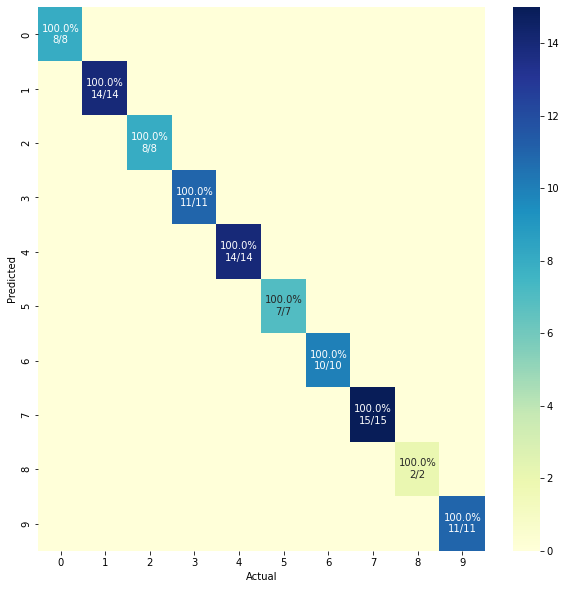

In [5]:
from reporting.evaluation import plot_confusion_matrix
from numpy import argmax

count = 100
prediction = model.predict(x_test[0:count])
plot_confusion_matrix(y_test[0:count], [argmax(x) for x in prediction])